## Assignment 2: Evaluating Regression Models
NOTE : PLEASE DO NOT POST/SHARE THE CODE OR YOUR SOLUTIONS ON THE WEB/GIT except CANVAS FOR GRADING

References : 
https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d
https://www.kaggle.com/c/house-prices-advanced-regression-techniques
https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
https://www.kaggle.com/henriqueyamahata/boston-housing-with-linear-regression#Trainning-Linear-Regression-Model
https://medium.com/@amitg0161/sklearn-linear-regression-tutorial-with-boston-house-dataset-cde74afd460a 

Problem Statement : Advising a real estate brokerage firm to assess the market value of residential real estate.

Background Materials/Data :
This  assignment involves fitting regression models with Python. You are asked to fit regression models to data from the Boston Housing Study. For your convenience, the data set (comma-delimited file boston.csv) and initial code for reading those data into Python are below.

Instructions:
- Use all explanatory variables (with the exception of neighborhood) and all 506 census tract observations from the Boston Housing Study. Use one of two response variables: 
   (1) the median value of homes in thousands of 1970 dollars or 
   (2) the log median value of homes in thousands of 1970 dollars. 
- Employ at least TWO regression modeling methods selected from those discussed in Chapter 4 of the Géron (2017) textbook: linear regression, ridge regression, lasso regression, and elastic net. 
- Evaluate these methods within a cross-validation design, using root mean-squared error (RMSE) as an index of prediction error.
- Python scikit-learn should be your primary environment for conducting this research. Note that it is not necessary to employ polynomial regression in this assignment.


Deliverables and File Formats
Please use this notebook to update comments. Upload your notebook/knitted HTML file in canvas for grading and also include the jupyter notebook/code. Feel free to delete/add/update code as needed based on your own research and implementation style

Formatting Python Code
Refer to Google’s Python Style Guide (https://google.github.iostyleguide/pyguide.html) for ideas about formatting Python code:

NOTE : 
- Below is the starter code and please feel free to update/edit/change to provide your thoughts/solutions to the problem. 
- Comment often and in detail, highlighting major sections of code, describing the thinking behind the methods being employed.
- This code has a lot of errors (intentionally, including the data dictionary) make sure to update all the cells based on best practices along with your analysis/findings.



GRADING GUIDELINES (100 points)
--------------------------------
(1) Data preparation, exploration, visualization (20 points)
(2) Review research design and modeling methods (20 points)
(3) Review results, evaluate models (20 points)
(4) Implementation and programming (20 points)
(5) Exposition, problem description, and management recommendations (20 points)


## Variables updated to align with dataset output 

Dataset

Variable         Name Description
-------------------------------------
neighborhood --> Name of the Boston neighborhood
                 (location of the census tract)
                 
crim         --> Per capita crime rate by town

zn           --> Proportion of residential land zoned for lots larger than 25,000 sq.ft.

indus        --> Proportion of non-retail business acres per town

chas         --> On the Charles River (1) or not (0)

nox          --> Nitric oxides concentration (parts per 10 million)

rooms        --> Average number of rooms per home

age          --> Percentage of homes built before 1940

dis          --> Weighted distance to employment centers

rad          --> Accessibility to radial highways

tax          --> full-value property-tax rate per $10,000

ptratio      --> Pupil/teacher ratio in public schools

lstat        --> Percentage of population of lower socio-economic status

mv           --> Median value of homes in thousands of 1970 dollars


Note: Try to see if you can embed this structure ( ML end to end pipeline )
- Look at the big picture.
- Get the data.
- Discover and visualize the data to gain insights.
- Prepare the data for Machine Learning algorithms.
- Select a model and train it.
- Fine-tune your model.
- Present your solution.


### Boston Housing Study (Python) using data from the Boston Housing Study case as described in "Marketing Data Science: Modeling Technique for Predictive Analytics with R and Python" (Miller 2015)

### Here we use data from the Boston Housing Study to evaluate regression modeling methods within a cross-validation design.

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore", category=Warning)

In [2]:
# import base packages into the namespace for this program
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from array import array
import pickle


# modeling routines from Scikit Learn packages
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import get_scorer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score  
from math import sqrt  # for root mean-squared error calculation
from sklearn.metrics import r2_score

In [3]:
# output of plotting commands is displayed inline directly below the code cell that produced it
%matplotlib inline

In [4]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

In [5]:
# Although we standardize X and y variables on input, we will fit the intercept term in the models
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True

## I am unable to import Google.Colab via pip install. Therefore I am commenting this section out and loading the data directly 

In [6]:
# #S2 Mount Google Drive to Colab Enviorment
# from google.colab import drive
# drive.mount('/content/gdrive')

In [7]:
# #S3 Establish working directory
# import os # Operation System
# os.getcwd()
# %cd /content/gdrive/My Drive/Assignments/2/
# !pwd
# !ls
# print('Working Directory')
# print(os.getcwd())
# work_dir = "/content/gdrive/My Drive/Assignments/2/"

In [8]:
boston_input = pd.read_csv('boston.csv')

In [9]:
# read data for the Boston Housing Study
# creating data frame restdata
#boston_input = pd.read_csv(work_dir+'./data/boston.csv')

# check the pandas DataFrame object boston_input
print('\nboston DataFrame (first and last five rows):')
print(boston_input.head())
print(boston_input.tail())


boston DataFrame (first and last five rows):
  neighborhood     crim    zn  indus  chas    nox  rooms   age     dis  rad  \
0       Nahant  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1   Swampscott  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2   Swanpscott  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3   Marblehead  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4   Marblehead  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio  lstat    mv  
0  296     15.3   4.98  24.0  
1  242     17.8   9.14  21.6  
2  242     17.8   4.03  34.7  
3  222     18.7   2.94  33.4  
4  222     18.7   5.33  36.2  
    neighborhood     crim   zn  indus  chas    nox  rooms   age     dis  rad  \
501     Winthrop  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502     Winthrop  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503     Winthrop  0.06076  0.0  11.93     0  0.573  6

In [10]:
print('\nGeneral description of the boston_input DataFrame:')
print(boston_input.info())


General description of the boston_input DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   neighborhood  506 non-null    object 
 1   crim          506 non-null    float64
 2   zn            506 non-null    float64
 3   indus         506 non-null    float64
 4   chas          506 non-null    int64  
 5   nox           506 non-null    float64
 6   rooms         506 non-null    float64
 7   age           506 non-null    float64
 8   dis           506 non-null    float64
 9   rad           506 non-null    int64  
 10  tax           506 non-null    int64  
 11  ptratio       506 non-null    float64
 12  lstat         506 non-null    float64
 13  mv            506 non-null    float64
dtypes: float64(10), int64(3), object(1)
memory usage: 55.5+ KB
None


In [11]:
# drop neighborhood from the data being considered
boston = boston_input.drop('neighborhood', 1)

print('\nGeneral description of the boston DataFrame:')
print(boston.info())


General description of the boston DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rooms    506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  mv       506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB
None


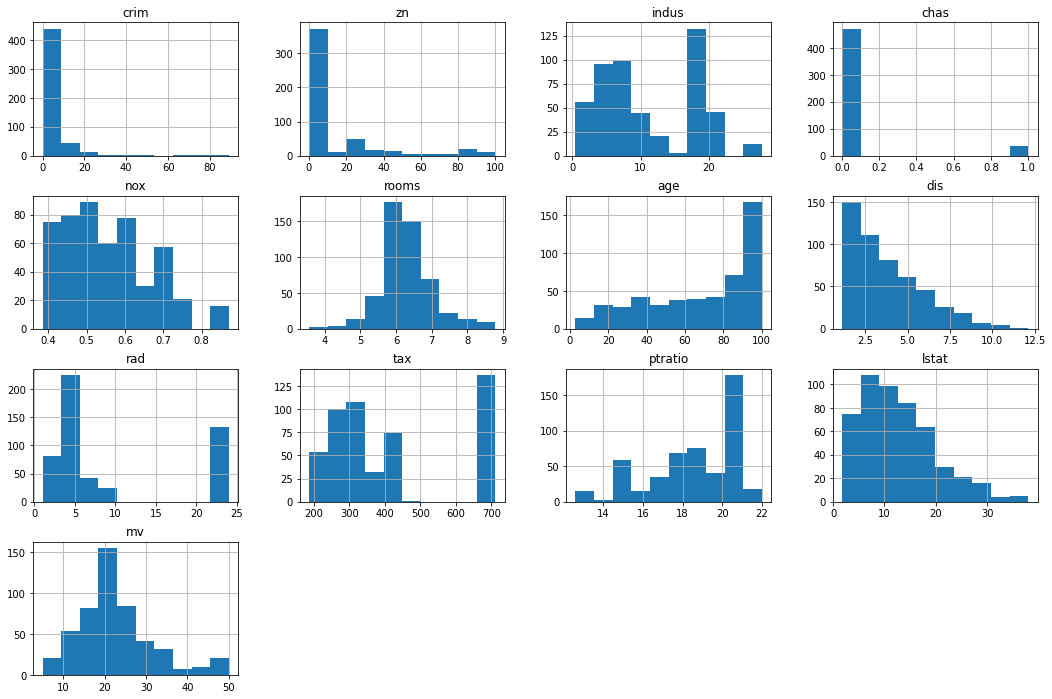

In [12]:
# Check distributions of non-categorical variables for boston housing by histogram
boston.hist(figsize=(18,12))
plt.show('plot-histogram-boston')

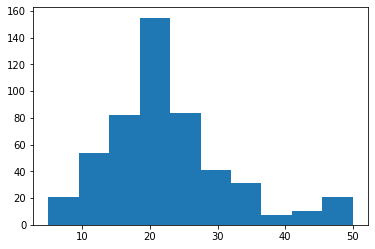

In [13]:
# Single histogram of response variable : Median Value
plt.hist(boston['mv'])
plt.show('plot-histogram-boston-mv')

In [14]:
# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.pdf', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)

<Figure size 432x288 with 0 Axes>

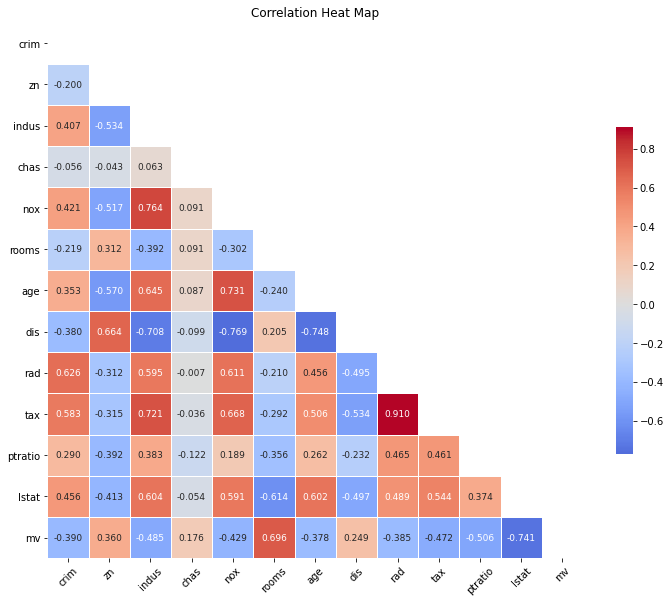

In [15]:
# examine correlations among boston housing data set
# with correlation matrix/heat map
corr_chart(df_corr = boston) 

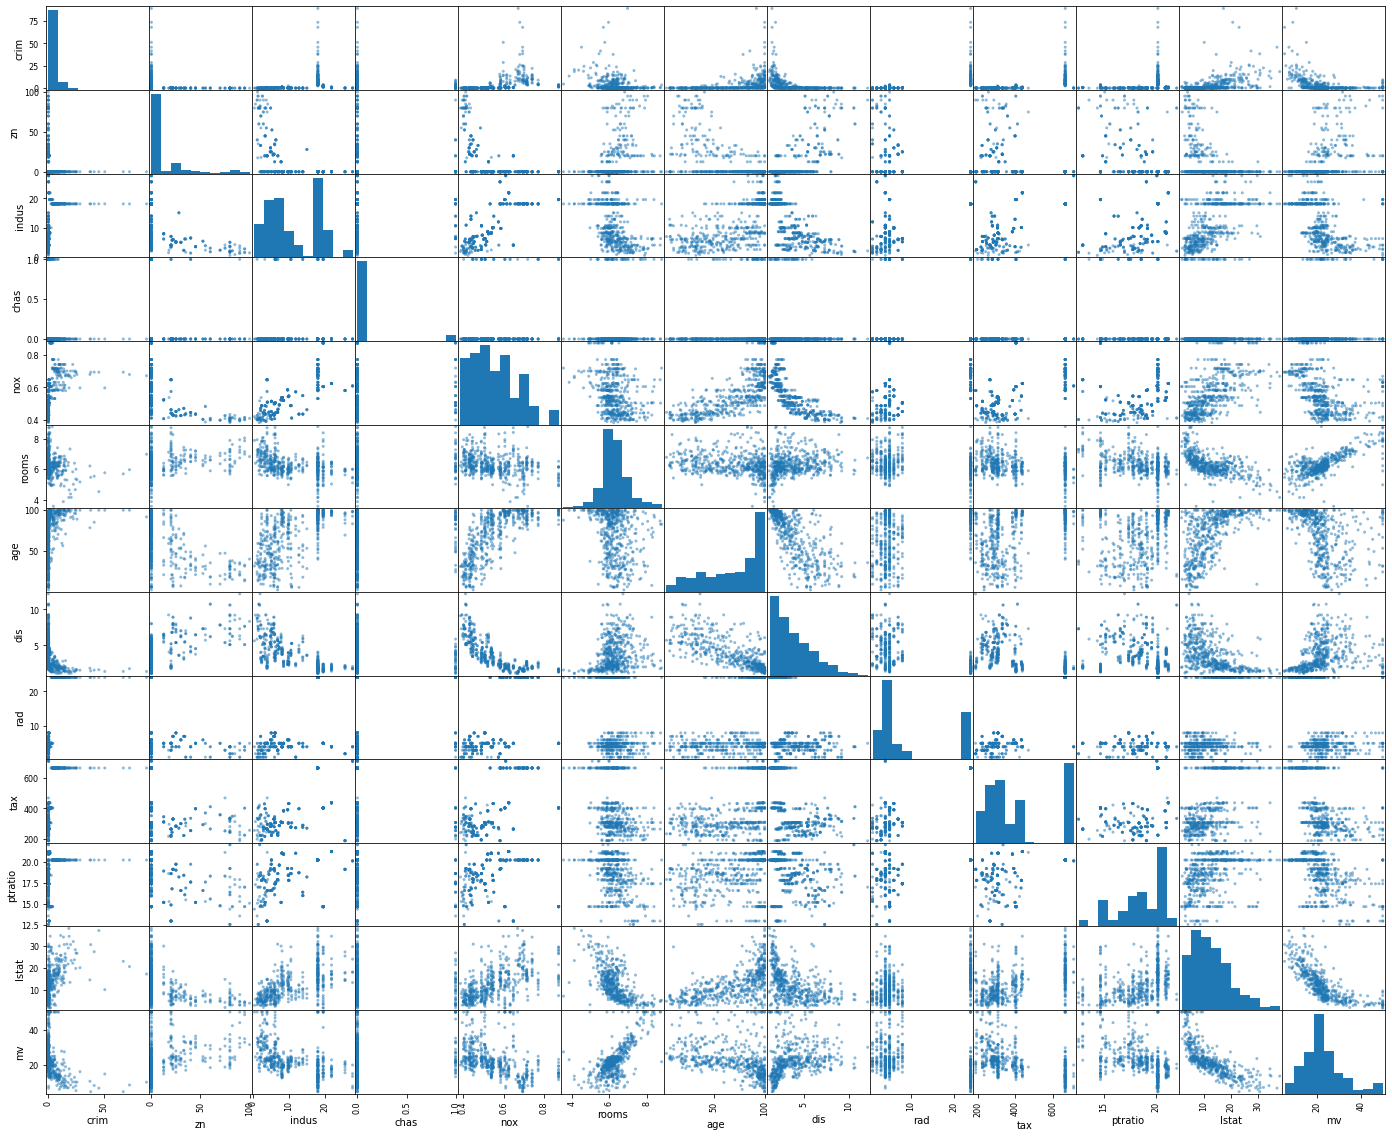

In [16]:
#Creare scatter plots of boston houisng data set. 
scatter_matrix(boston, figsize=(24, 20))
plt.show('Scatter Plot Matrix of boston data set')

In [17]:
print('\nDescriptive statistics of the boston DataFrame:')
print(boston.describe())


Descriptive statistics of the boston DataFrame:
             crim          zn       indus        chas         nox       rooms  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       lstat  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.

In [18]:
# set up preliminary data for data for fitting the models 
# the first column is the median housing value response
# the remaining columns are the explanatory variables
prelim_model_data = np.array([boston.mv,\
    boston.crim,\
    boston.zn,\
    boston.indus,\
    boston.chas,\
    boston.nox,\
    boston.rooms,\
    boston.age,\
    boston.dis,\
    boston.rad,\
    boston.tax,\
    boston.ptratio,\
    boston.lstat]).T

In [19]:
# dimensions of the polynomial model X input and y response
# preliminary data before standardization
print('\nData dimensions:', prelim_model_data.shape)


Data dimensions: (506, 13)


## Split X and y for modeling, apply log function to y values, apply polynomial features to x values.

### We apply the log function to y to determine if using the log median value of homes positively impacts scoring. We apply polynomial features to x to determine if the use of polynomial features positively impacts model scoring.

In [20]:
# # standard scores for the columns... along axis 0
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# split features from outcomes for model prep
X_unscaled = prelim_model_data[:,1:12]
y = prelim_model_data[:,0]

# # scale feature variables
# X = scaler.fit_transform(X_unscaled)

# get log of y to see if that yields better accuracy  
y_log = np.log((y))

# Add polynomial features to x 
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_unscaled)

# split the data for modeling
X_train, X_test, y_train, y_test = train_test_split(X_unscaled, y, test_size=0.2, random_state = 42)

# split the data using log value for y
X_trainLog, X_testLog, y_trainLog, y_testLog = train_test_split(X_unscaled, y_log, test_size=0.2, random_state = 42)

# split the data using polynomial features for x and log value for y
X_trainLogPoly, X_testLogPoly, y_trainLogPoly, y_testLogPoly = train_test_split(x_poly, y_log, test_size=0.2, random_state = 42)

### Evaluate modeling methods within a cross-validation design, using root mean-squared error (RMSE) as an index of prediction error. 

### RMSE outputs using the log median value of homes  and RMSE outputs using the log median value of homes and polynomial x features have been included as well. 

### We will compare the following datasets within accuracy scoring to determine which x features and response variables to use:  
1. Standard X Features and Response Variables
2. Standard X Features with the log median values of homes as the output variable
3. Polynomial X features and the log median values of homes as the output variable

In [21]:
pipelines = []
pipelines.append(('LR', Pipeline([('LRLog',LinearRegression())])))
pipelines.append(('LASSO', Pipeline([('LASSOLog', Lasso())])))
pipelines.append(('EN', Pipeline([('ENLog', ElasticNet())])))
pipelines.append(('Ridge', Pipeline([('RIDGELog', Ridge())])))
# We will also include RidgeCV, which has its own cross-validation built-in
pipelines.append(('RidgeCV', Pipeline([('RidgeCVLog', RidgeCV())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=RANDOM_SEED, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    cv_log_results = cross_val_score(model, X_trainLog, y_trainLog, cv=kfold, scoring='neg_mean_squared_error')
    cv_log_poly_results = cross_val_score(model, X_trainLogPoly, y_trainLogPoly, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    results.append(cv_log_results)
    names.append(name)
    msg = "%s: %f (%f) %s: %f (%f) %s: %f (%f)" % (name, cv_results.mean(), cv_results.std(), 'Log Outputs', cv_log_results.mean(), cv_log_results.std(), 'Log Poly Outputs', cv_log_poly_results.mean(), cv_log_poly_results.std())
    print(msg)

LR: -30.027338 (12.323275) Log Outputs: -0.056510 (0.015836) Log Poly Outputs: -0.259680 (0.570133)
LASSO: -34.844294 (12.121010) Log Outputs: -0.112638 (0.021986) Log Poly Outputs: -0.063117 (0.019556)
EN: -40.205819 (11.771577) Log Outputs: -0.108736 (0.022738) Log Poly Outputs: -0.058364 (0.016507)
Ridge: -30.355589 (13.060397) Log Outputs: -0.057200 (0.017221) Log Poly Outputs: -0.045353 (0.016124)
RidgeCV: -30.031278 (12.465270) Log Outputs: -0.056518 (0.016070) Log Poly Outputs: -0.045558 (0.020774)


## Establish StandardScaler for scaling data, apply scaler to X_train and X_test features

We scale the data to give equal weights/importance to each variable so that no single variable steers model performance in one direction just because they are bigger numbers. After testing scaling the data before cross-validation and after cross-validation, I found that scaling the data after cross-validation yielded higher test_accuracy. For more information, see the follwing link:
https://towardsdatascience.com/data-normalization-in-machine-learning-395fdec69d02

In [22]:
# standard scores for the columns... along axis 0
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# scale feature variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Based on Cross-Validation outputs using RMSE, we will move forward with fine-tuning the Ridge model and RidgeCV model, as these gave us the optimal RMSE scores accross the different datasets

## Calculate Accuracy Scores for the Ridge and RidgeCV models, looking at testing and training outputs 

### Looking at accuracy results, we can see that the polynomial X features combined with the log median value of homes yields much higher accuracy results along with reducing the amount of overfitting within the models. 

### We can also see that, using hyperparameter tuning, RidgeCV yields the best test accuracy scoring 

In [23]:
# Establish models of interest to input into accuracy function
RIDGE = Ridge()
ridgeCV = RidgeCV(alphas=[0.1, 1.0, 10.0])

# Produce and save the model, then load and apply the model.
def model_scoring(name, model, trainX, trainy, testX, testy):
    name = model()
    name.fit(trainX, trainy)
    predictions = name.predict(testX)
    train_score = round(name.score(trainX, trainy) * 100, 2)
    test_score = round(name.score(testX, testy) * 100, 2)
    print(name, "Train Accuracy: ", train_score)
    print(name, "Test Accuracy: ", test_score, '\n')

# Output Accuracy scoring for train and test sets, looking at the Standard and Log Response Variables 
print("Standard Scaling Accuracy:---------------------------------------")
model_scoring(RIDGE, Ridge, X_train, y_train, X_test, y_test)
model_scoring(ridgeCV, RidgeCV, X_train, y_train, X_test, y_test)

# This looks at accuracy scoring with the log median value of homes 
print("Standard Scaling Accuracy with Log:---------------------------------------")
model_scoring(RIDGE, Ridge, X_trainLog, y_trainLog, X_testLog, y_testLog)
model_scoring(ridgeCV, RidgeCV, X_trainLog, y_trainLog, X_testLog, y_testLog)

# This looks at accuracy scoring with the log median value of homes and polynomial features included in X features
print("Standard Scaling Accuracy with Log Poly:---------------------------------------")
model_scoring(RIDGE, Ridge, X_trainLogPoly, y_trainLogPoly, X_testLogPoly, y_testLogPoly)
model_scoring(ridgeCV, RidgeCV, X_trainLogPoly, y_trainLogPoly, X_testLogPoly, y_testLogPoly)

Standard Scaling Accuracy:---------------------------------------
Ridge() Train Accuracy:  68.21
Ridge() Test Accuracy:  55.55 

RidgeCV(alphas=array([ 0.1,  1. , 10. ])) Train Accuracy:  68.1
RidgeCV(alphas=array([ 0.1,  1. , 10. ])) Test Accuracy:  55.83 

Standard Scaling Accuracy with Log:---------------------------------------
Ridge() Train Accuracy:  68.74
Ridge() Test Accuracy:  66.14 

RidgeCV(alphas=array([ 0.1,  1. , 10. ])) Train Accuracy:  69.13
RidgeCV(alphas=array([ 0.1,  1. , 10. ])) Test Accuracy:  66.06 

Standard Scaling Accuracy with Log Poly:---------------------------------------
Ridge() Train Accuracy:  84.39
Ridge() Test Accuracy:  76.76 

RidgeCV(alphas=array([ 0.1,  1. , 10. ])) Train Accuracy:  83.74
RidgeCV(alphas=array([ 0.1,  1. , 10. ])) Test Accuracy:  77.17 



## The nice part about RidgeCV is the built-in cross-validation function. You can also see what the optimal alpha level is. 

Resources: 
https://chrisalbon.com/code/machine_learning/linear_regression/selecting_best_alpha_value_in_ridge_regression/

In [24]:
regr_cv = RidgeCV(alphas=[0.1, 1.0, 10.0])

# Fit the linear regression
model_cv = regr_cv.fit(X_trainLogPoly, y_trainLogPoly)

# View alpha
model_cv.alpha_

10.0

## Pickle the optimized model, RidgeCV, so it can be used to test future data. 

## We should note that the optimal dataset to employ the model on is the Polynomial X Features and the log median values of homes as the output variable

In [25]:
# Firstly we will be using the dump() function to save the model using pickle
saved_model = pickle.dumps(ridgeCV)

# Then we will be loading that saved model
rfr_from_pickle = pickle.loads(saved_model)

## Another method for determining the optimal model type and hyperparameters, along with plotting train/test/validation results, can be seen using the following functions, which were pulled from the article listed below. 

## I have used RidgeCV, X polynomial features, and the log median value of homes, as we have identified these as the optimized dataset and model type. I used r2 as the scoring method, but you could use neg_mean_squared_error as your scoring metric of interest as well. 

Article: https://towardsdatascience.com/hyperparameter-tuning-in-lasso-and-ridge-regressions-70a4b158ae6d

In [26]:
def regmodel_param_plot(
    validation_score, train_score, alphas_to_try, chosen_alpha,
    scoring, model_name, test_score = None, filename = None):
    
    plt.figure(figsize = (8,8))
    sns.lineplot(y = validation_score, x = alphas_to_try, 
                 label = 'validation_data')
    sns.lineplot(y = train_score, x = alphas_to_try, 
                 label = 'training_data')
    plt.axvline(x=chosen_alpha, linestyle='--')
    if test_score is not None:
        sns.lineplot(y = test_score, x = alphas_to_try, 
                     label = 'test_data')
    plt.xlabel('alpha_parameter')
    plt.ylabel(scoring)
    plt.title(model_name + ' Regularisation')
    plt.legend()
    if filename is not None:
        plt.savefig(str(filename) + ".png")
    plt.show()

In [27]:
def regmodel_param_test(
    alphas_to_try, X, y, cv, scoring = 'neg_mean_squared_error', 
    model_name = 'LASSO', X_test = None, y_test = None, 
    draw_plot = False, filename = None):
    
    validation_scores = []
    train_scores = []
    results_list = []
    if X_test is not None:
        test_scores = []
        scorer = get_scorer(scoring)
    else:
        test_scores = None

    for curr_alpha in alphas_to_try:
        
        if model_name == 'LASSO':
            regmodel = Lasso(alpha = curr_alpha)
        elif model_name == 'Ridge':
            regmodel = Ridge(alpha = curr_alpha)
        else:
            return None

        results = cross_validate(
            regmodel, X, y, scoring=scoring, cv=cv, 
            return_train_score = True)

        validation_scores.append(np.mean(results['test_score']))
        train_scores.append(np.mean(results['train_score']))
        results_list.append(results)

        if X_test is not None:
            regmodel.fit(X,y)
            y_pred = regmodel.predict(X_test)
            test_scores.append(scorer(regmodel, X_test, y_test))
    
    chosen_alpha_id = np.argmax(validation_scores)
    chosen_alpha = alphas_to_try[chosen_alpha_id]
    max_validation_score = np.max(validation_scores)
    if X_test is not None:
        test_score_at_chosen_alpha = test_scores[chosen_alpha_id]
    else:
        test_score_at_chosen_alpha = None
        
    if draw_plot:
        regmodel_param_plot(
            validation_scores, train_scores, alphas_to_try, chosen_alpha, 
            scoring, model_name, test_scores, filename)
    
    return chosen_alpha, max_validation_score, test_score_at_chosen_alpha

In [28]:
# Establish cross-validation components and alphas to be tested in function
cv = KFold(n_splits=10, random_state=RANDOM_SEED, shuffle=True)
ridge_alphas = np.linspace(1, 10, 10)

### As you can see, the function provided by the article yields a similar accuracy score for the RidgeCV model. We see that how information loss fluctuates between the validation, train, and test data as the alpha moves towards 10.

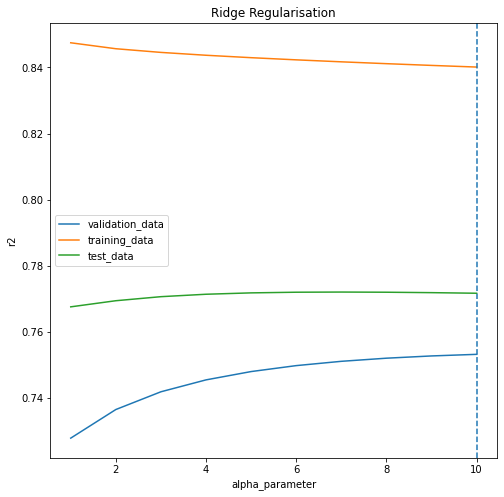

Chosen alpha: 10.00000
Validation score: 0.75322
Test score at chosen alpha: 0.77170


In [29]:
chosen_alpha, max_validation_score, test_score_at_chosen_alpha = \
    regmodel_param_test(
        ridge_alphas, X_trainLogPoly, y_trainLogPoly, 
        cv, scoring = 'r2', model_name = 'Ridge', 
        X_test = X_testLogPoly, y_test = y_testLogPoly, 
        draw_plot = True, filename = 'Ridge_wide_search')

print("Chosen alpha: %.5f" % \
    chosen_alpha)
print("Validation score: %.5f" % \
    max_validation_score)
print("Test score at chosen alpha: %.5f" % \
    test_score_at_chosen_alpha)

### Boston Housing Study : 
Imagine that you are advising a real estate brokerage firm in its attempt to employ machine learning methods. The firm wants to use machine learning to complement conventional methods for assessing the market value of residential real estate. Of the modeling methods examined in your study, which would you recommend to management, and why?

#### REPORT/FINDINGS: 

(1) A summary and problem definition for management

(2) Discussion of the research design, measurement and statistical methods, traditional and machine learning methods employed 

(3) List assumptions, programming work, issues along with model evaluation metrics; and

(4) Review of results with recommendations for management.

### (1) A summary and problem definition for management

The housing market uses a number of different factors to determine pricing for a household. Some of these variables can be quantified and used within a Machine Learning model. By streamlining housing data using the provided dataset, we can run several different ML models and determine which modeling approach yields the highest level of accuracy for predicting housing prices. The goal stemming from the opimized model is to predict the price of houses coming onto the market to determine if said house may be over or under-valued.

### (2) Discussion of the research design, measurement and statistical methods, traditional and machine learning methods employed

Because we are attempting to predict the actual price of houses, this will be a regression problem, not a classification problem (which would be something like the inclusion of a binary indicator telling you if the house is good value or bad value). Prior to imputting the data into a number of regression models, we need to use EDA to determine if all fields are outputting correctly and providing value. Once EDA is complete, we adjust parameters as-needed and split the data into test/train sets (which includes data that will be used for cross-validation). This includes spillting the data using several tuning parameters on the X and Y variables. This includes using the log median value of homes for our output variable and applying polynomial features to the X variables. After the data has been prepared for modeling, we will use the four regression techniques outlined in the instructions: LinearRegression, Lasso, Elastic Net, and Ridge. We will also use RidgeCV, which is like Ridge but also employs cross-validation techniques within the model. We first review the RMSE scores of each model output to determine which models yield the lowest RMSE scores, indicating the model does a better job of fitting the data close to our regression line. Once we have identified models that yield the lowest RMSE scores, we review the model accuracy scores for both the train and test sets using the different X and Y variables we have manipulated. We do this to determine how accurate our models are at predicting housing prices while also determine if our models are over/under-fit, which can be determined by checking the variance between train and test accuracy. After we have checked for accuracy, we will tune model hyperparamters (where applicable) to attempt improving accuracy further. Once we have taken all these steps, we can pickle the model to use for future housing data that we receive. 

### (3) List assumptions, programming work, issues along with model evaluation metrics

Several assumptions were made while developing these regression models:
1. Per the instructions, we must use all associated variables and rows in the provided dataset. We may be able to decrese RMSE or increase accuracy by exluding certain variables or including newly-created variables. However, I am making the assumption that we are being asked to only use the provided variables and data. 
2. I am only attempting to employ the regression models outlined in the instructions: LinearRegression, Lasso, ElasticNet, Rdige. There are other regression models that we could test (Polynomial Regression, Bayesian Regression, Random Forrest Regression), but I am assuming we should only look at the models provided in the instructions for this assignment.

Per the instructions, I am using RMSE as the primary evaluation method for model performance. Models with the lowest RMSE scores were selected for further model-tuning. After selecting models based on RMSE, I used accuracy to determine which model to eventually select, along with using accuracy discrepancy to select a model that was not too overfit.

### (4) Review of results with recommendations for management.

After reviewing model performance metrics, the RidgeCV regression approach yields the best results (lowest RMSE, highest accuracy, lowest discrepancy between train/test sets. It is also very important to manipulate the dataset by employing polynomial features for the X variables and the log median value of homes for the output variable. My recommendations to management would be as-follows:
1. Use Polynomial X features and the log median values of homes as the output variable when using the RidgeCV model
2. Employ the selected model on a larger dataset (if possible) to increase model performance
3. Consider excluding certain variables and including new variables, if they become available, to determine if this increases performance metrics. 
4. Consider including more regression modeling techniques to see if those models yield higher performance metrics 